<a href="https://colab.research.google.com/github/juliavassimon/trabalho_py/blob/main/trabalho.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

Coeficiente Angular (A): -0.0000
Coeficiente Linear (B): 0.0942


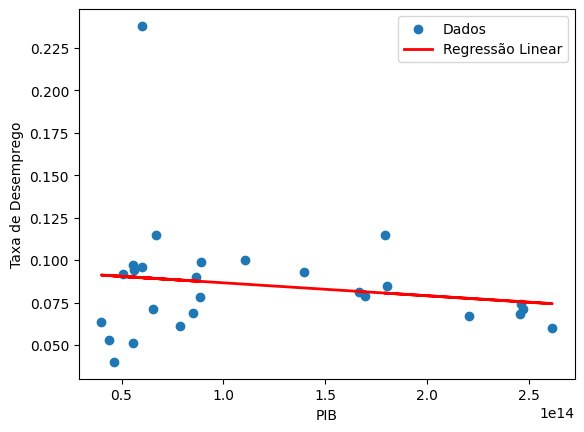

In [25]:
data = pd.read_csv('https://raw.githubusercontent.com/juliavassimon/trabalho_py/main/trab-python.CSV', delimiter=';')
df = pd.DataFrame(data)
#limpeza de dados
df['PIB'] = df['PIB'].str.replace('[$.,]', '', regex=True).astype(float)
df['taxa de desemprego'] = df['taxa de desemprego'].str.replace(',', '.', regex=True).str.rstrip('%').astype(float) / 100  # Divida por 100
#montando o grafico
X = df[['PIB']]
Y = df['taxa de desemprego']
regressao = LinearRegression()
regressao.fit(X, Y)
coef_angular = regressao.coef_[0]
coef_linear = regressao.intercept_
print(f'Coeficiente Angular (A): {coef_angular:.4f}')
print(f'Coeficiente Linear (B): {coef_linear:.4f}')
plt.scatter(X, Y, label='Dados')
plt.plot(X, regressao.predict(X), color='red', linewidth=2, label='Regressão Linear')
plt.xlabel('PIB')
plt.ylabel('Taxa de Desemprego')
plt.legend()
plt.show()

In [ ]:
#mudando o nome da coluna
df.columns = df.columns.str.replace('taxa de desemprego','taxa_desemprego')
#media
media_pib = df['PIB'].mean()
media_taxa_desemprego = df['taxa_desemprego'].mean()
#mediana
mediana_pib = df['PIB'].median()
mediana_taxa_desemprego = df['taxa_desemprego'].median()
#moda
moda_pib = df['PIB'].mode().values[0]
moda_taxa_desemprego = df['taxa_desemprego'].mode().values[0]
#desvio padrão
desvio_pib = df['PIB'].std()
desvio_taxa_desemprego = df['taxa_desemprego'].std()



print("PIB:")
print(f"Média: {media_pib:.2f}")
print(f"Mediana: {mediana_pib:.2f}")
print(f"Moda: {moda_pib:.2f}")
print(f"Desvio Padrão: {desvio_pib:.2f}")


print("\nTaxa de Desemprego:")
print(f"Média: {media_taxa_desemprego:.2f}")
print(f"Mediana: {mediana_taxa_desemprego:.2f}")
print(f"Moda: {moda_taxa_desemprego:.2f}")
print(f"Desvio Padrão: {desvio_taxa_desemprego:.2f}")


PIB:
Média: 118415538592087.62
Mediana: 86372339508832.00
Moda: 40059925000000.00
Desvio Padrão: 74477197281507.12

Taxa de Desemprego:
Média: 0.09
Mediana: 0.08
Moda: 0.07
Desvio Padrão: 0.04


In [ ]:
agrupado = df.groupby('ANO').size().reset_index(name='Contagem')
print(agrupado)

     ANO  Contagem
0   1990         1
1   1991         1
2   1992         1
3   1993         1
4   1994         1
5   1995         1
6   1996         1
7   1997         1
8   1998         1
9   1999         1
10  2000         1
11  2001         1
12  2002         1
13  2003         1
14  2004         1
15  2005         1
16  2006         1
17  2007         1
18  2008         1
19  2009         1
20  2010         1
21  2011         1
22  2012         1
23  2013         1
24  2014         1
25  2015         1
26  2016         1


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ANO              27 non-null     int64  
 1   PIB              27 non-null     float64
 2   taxa_desemprego  27 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 776.0 bytes


In [22]:
df['PIB'].value_counts()

$461.951.782.000,00      1
$669.316.239.316,24      1
$1.803.652.649.613,75    1
$2.455.993.200.170,00    1
$2.472.806.919.901,67    1
$2.465.188.674.415,03    1
$2.616.201.578.192,25    1
$2.208.871.646.202,82    1
$1.667.019.605.881,76    1
$1.695.824.517.395,57    1
$1.397.084.381.901,29    1
$1.107.640.325.472,35    1
$891.629.970.423,92      1
$558.320.116.997,08      1
$602.860.000.000,00      1
$507.962.741.819,92      1
$559.372.502.338,24      1
$655.421.153.320,58      1
$599.388.879.704,63      1
$863.723.395.088,32      1
$883.199.443.413,73      1
$850.425.828.275,79      1
$785.643.456.467,26      1
$558.111.997.497,26      1
$437.798.577.639,75      1
$400.599.250.000,00      1
$1.796.186.586.414,45    1
Name: PIB, dtype: int64

In [23]:
df['taxa_desemprego'].value_counts()

KeyError: ignored